In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torchinfo import summary
from scripts import data_setup, data_acquisition, engine, predict
from pathlib import Path
from tqdm.auto import tqdm
from random import sample
from torch.utils.tensorboard import SummaryWriter

c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Setup Hyperparameters
BATCH_SIZE = 32
NUM_WORKERS = 0

In [7]:
data_path = Path("data")
image_path = data_path / "pizza_steak_sushi_20%"
train_dir = image_path / "train"
test_dir = image_path /"test"

In [4]:
# Setup manual transforms as required in the ViT

manual_transforms = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.ToTensor()
])

In [7]:
# This code cell can be used to download a dataset from a URL and extract it to a specified directory

# This is a smaller version of the Food101 dataset

# data_acquisition.acquire_data(image_path=image_path,
#                               url = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
#                               zip_name = "pizza_steak_sushi_20%")

# train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(data_dir=image_path,
#                                                                                train_transform=manual_transforms,
#                                                                                test_transform=manual_transforms,
#                                                                                batch_size=BATCH_SIZE,
#                                                                                num_workers=NUM_WORKERS)

Image directory already exists


In [8]:
# Obtain required dataset. This may be commented out and the cell may be run again to download the dataset from a URL

train_dataset = datasets.CIFAR10(root = data_path,
                                  train = True,
                                  transform = manual_transforms,
                                  download = True)
test_dataset = datasets.CIFAR10(root = data_path,
                                train = False,
                                transform = manual_transforms,
                                download = True)

# Setup the dataloaders

train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset = test_dataset,
                            batch_size=BATCH_SIZE,
                            shuffle=False,
                            num_workers=NUM_WORKERS)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
# Inspect our data

print(f"Number of train images: {len(train_dataset)}, Number of test images: {len(test_dataset)}\n")
print(f"Number of train batches: {len(train_dataloader)}, Number of test batches: {len(test_dataloader)}\n")
print(f"{len(train_dataset) // BATCH_SIZE} batches in the train dataloader expected and {len(test_dataset) // BATCH_SIZE} batches in the test dataloader expected.\nNote: This may not be exactly equal and may differ by 1 batch due to rounding off")

Number of train images: 50000, Number of test images: 10000

Number of train batches: 1563, Number of test batches: 313

1562 batches in the train dataloader expected and 312 batches in the test dataloader expected.
 Note: This may not be exactly equal and may differ by 1 batch due to rounding off


In [82]:
# Visualizing a single image
first_image_batch, first_label_batch = next(iter(train_dataloader))
random_image_index = torch.randint(low = 0, high = len(first_image_batch), size=(1,)).item()

random_image = first_image_batch[random_image_index]
random_label = first_label_batch[random_image_index].item()

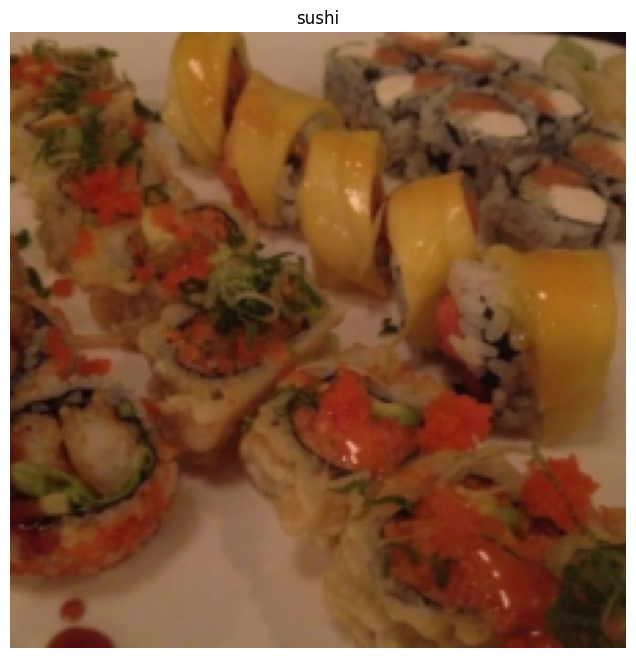

In [83]:
plt.figure(figsize = (12,8))
plt.imshow(random_image.permute(1,2,0))
plt.title(class_names[random_label])
plt.axis(False)
plt.show()